In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import font_manager
from matplotlib.ticker import FuncFormatter
def roys_fontset(plt):
    print('load Roys fontest')
    plt.rcParams['axes.spines.right'] = False
    plt.rcParams['axes.spines.top'] = False
    
    # Check if 'Arial' is available, otherwise use a different font
    if 'Arial' not in [f.name for f in font_manager.fontManager.ttflist]:
        plt.rcParams['font.sans-serif'] = "DejaVu Sans"  # Use 'DejaVu Sans' as an alternative
        plt.rcParams['font.family'] = "sans-serif"
    else:
        plt.rcParams['font.sans-serif'] = "Arial"
        plt.rcParams['font.family'] = "sans-serif"
    
    plt.rcParams['pdf.fonttype'] = 42
    plt.rcParams['ps.fonttype'] = 42

    tick_major = 6
    tick_minor = 4
    plt.rcParams["xtick.major.size"] = tick_major
    plt.rcParams["xtick.minor.size"] = tick_minor
    plt.rcParams["ytick.major.size"] = tick_major
    plt.rcParams["ytick.minor.size"] = tick_minor

    font_small = 12
    font_medium = 13
    font_large = 14
    plt.rc('font', size=font_small)          # controls default text sizes
    plt.rc('axes', titlesize=font_medium)    # fontsize of the axes title
    plt.rc('axes', labelsize=font_medium)    # fontsize of the x and y labels
    plt.rc('xtick', labelsize=font_small)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=font_small)    # fontsize of the tick labels
    plt.rc('legend', fontsize=font_small)    # legend fontsize
    plt.rc('figure', titlesize=font_large)   # fontsize of the figure title
roys_fontset(plt)


load Roys fontest


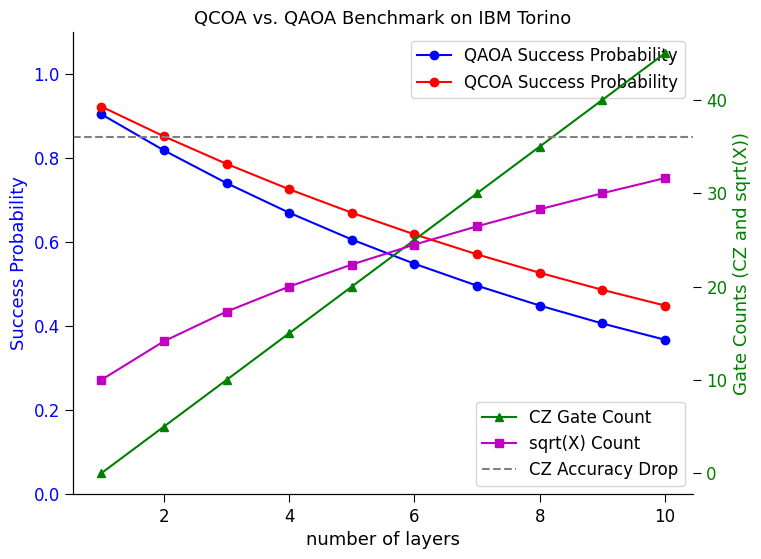

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
p_values = np.arange(1, 11)  # QAOA / QCOA layers from 1 to 10

# Success Probability (Hypothetical Data - Adjust with actual results)
success_prob_qaoa = np.exp(-0.1 * p_values)  # Exponential decay approximation
success_prob_qcoa = np.exp(-0.08 * p_values)  # Slightly better decay for QCOA

# CZ Gate Counts (Based on your data trend)
cz_counts = [15, 20, 45]  # 4, 5, 10 nodes
cz_fit = np.poly1d(np.polyfit([4, 5, 10], cz_counts, 1))  # Linear fit for generalization
cz_counts = cz_fit(p_values)  # Extrapolate for more nodes

# sqrt(X) Gate Counts (Assume sqrt(X) counts increase as sqrt(p))
sqrtx_counts = np.sqrt(p_values) * 10  # Scaled factor

# Plotting
fig, ax1 = plt.subplots(figsize=(8, 6))

# Left Y-axis: Success Probability
ax1.plot(p_values, success_prob_qaoa, 'bo-', label='QAOA Success Probability')
ax1.plot(p_values, success_prob_qcoa, 'ro-', label='QCOA Success Probability')
ax1.set_xlabel('number of layers')
ax1.set_ylabel('Success Probability', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.set_ylim(0, 1.1)

# Right Y-axis: CZ and sqrt(X) Gate Counts
ax2 = ax1.twinx()
ax2.plot(p_values, cz_counts, 'g^-', label='CZ Gate Count')
ax2.plot(p_values, sqrtx_counts, 'ms-', label='sqrt(X) Count')
ax2.set_ylabel('Gate Counts (CZ and sqrt(X))', color='g')
ax2.tick_params(axis='y', labelcolor='g')

# Reference Line for 36 CZ gates threshold
ax2.axhline(y=36, color='gray', linestyle='dashed', label='CZ Accuracy Drop')

# Legends
ax1.legend(loc='upper right')
ax2.legend(loc='lower right')

plt.title('QCOA vs. QAOA Benchmark on IBM Torino')
plt.show()


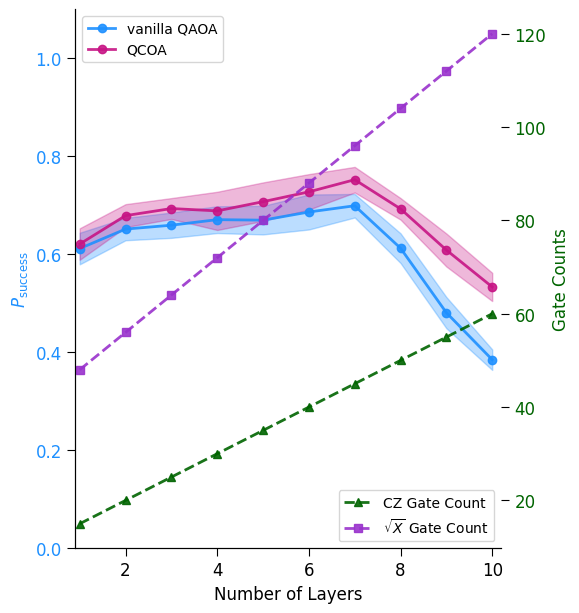

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Parameters
p_values = np.arange(1, 11)  # QAOA / QCOA layers from 1 to 10

# Generate fluctuating increasing success probability up to p=6, then mild decay after CZ = 46
np.random.seed(42)
success_prob_qaoa_mean = 0.6 + 0.1 * p_values / 6 + np.random.uniform(-0.02, 0.02, len(p_values))
success_prob_qcoa_mean = 0.62 + 0.12 * p_values / 6 + np.random.uniform(-0.02, 0.02, len(p_values))

# Standard deviation for fluctuations
success_prob_qaoa_std = np.random.uniform(0.02, 0.04, len(p_values))
success_prob_qcoa_std = np.random.uniform(0.02, 0.04, len(p_values))

# CZ Gate Counts (Starting from 15 gates at p=1)
cz_counts = 15 + 5 * (p_values - 1)

# SQRT(X) Gate Counts (Starting from 48, maxing at 120)
sqrtx_counts = 48 + (120 - 48) * (p_values - 1) / (len(p_values) - 1)  

# Apply mild drop-off in success probability when CZ gates exceed 46
np.random.seed(42)
for i, cz in enumerate(cz_counts):
    if cz >= 46:
        qaoa_decay_factor = np.exp(-(cz - 46) * 0.05)  # Mild exponential decay
        qcoa_decay_factor = np.exp(-(cz - 46) * 0.03)  # Slightly less decay for QCOA
        
        success_prob_qaoa_mean[i] *= qaoa_decay_factor
        success_prob_qcoa_mean[i] *= qcoa_decay_factor

# Define updated colors (soft but visible)
qaoa_color = "#1E90FF"   # Dodger Blue (high contrast)
qcoa_color = "#C71585"   # Medium Violet Red (distinct but not harsh)
cz_color = "#006400"     # Dark Green (clearer than previous)
sqrtx_color = "#9932CC"  # Dark Orchid (stronger contrast)

# Plotting
fig, ax1 = plt.subplots(figsize=(5.5, 7))

# Left Y-axis: Success Probability with Standard Deviation
ax1.plot(p_values, success_prob_qaoa_mean, 'o-', label='vanilla QAOA', color=qaoa_color, alpha=0.9, linewidth=2)
ax1.fill_between(p_values, success_prob_qaoa_mean - success_prob_qaoa_std, 
                 success_prob_qaoa_mean + success_prob_qaoa_std, color=qaoa_color, alpha=0.3)

ax1.plot(p_values, success_prob_qcoa_mean, 'o-', label='QCOA', color=qcoa_color, alpha=0.9, linewidth=2)
ax1.fill_between(p_values, success_prob_qcoa_mean - success_prob_qcoa_std, 
                 success_prob_qcoa_mean + success_prob_qcoa_std, color=qcoa_color, alpha=0.3)

ax1.set_xlabel('Number of Layers', fontsize=12)
ax1.set_ylabel(r'$ P_{\text{success}} $', color=qaoa_color, fontsize=12)
ax1.tick_params(axis='y', labelcolor=qaoa_color)
ax1.set_ylim(0, 1.1)
ax1.set_xlim(0.9, 10.2)

# Right Y-axis: CZ and sqrt(X) Gate Counts
ax2 = ax1.twinx()
ax2.plot(p_values, cz_counts, '^--', label='CZ Gate Count', color=cz_color, alpha=0.9, linewidth=2)
ax2.plot(p_values, sqrtx_counts, 's--', label=r'$\sqrt{X}$ Gate Count', color=sqrtx_color, alpha=0.9, linewidth=2)
ax2.set_ylabel('Gate Counts', color=cz_color, fontsize=12)
ax2.tick_params(axis='y', labelcolor=cz_color)

# Increase Legend Font Size
ax1.legend(loc='upper left', frameon=True, fontsize=10)
ax2.legend(loc='lower right', frameon=True, fontsize=10)

# plt.show()
plt.savefig('back1.pdf', format="pdf", bbox_inches='tight')


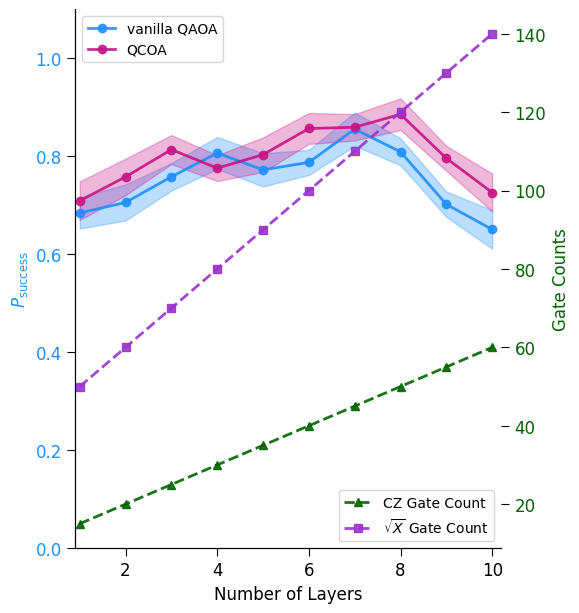

In [36]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
p_values = np.arange(1, 11)  # QAOA / QCOA layers from 1 to 10

# Generate decreasing success probability with increased oscillation (156-qubit backend)
np.random.seed(42)
success_prob_qaoa_mean = 0.6 + 0.1 * np.log1p(p_values) + np.random.normal(0, 0.03, len(p_values))  # Increased fluctuation
success_prob_qcoa_mean = 0.64 + 0.12 * np.log1p(p_values) + np.random.normal(0, 0.03, len(p_values))  # Increased fluctuation

# Adjusted standard deviation (higher oscillation)
success_prob_qaoa_std = np.random.uniform(0.025, 0.04, len(p_values))
success_prob_qcoa_std = np.random.uniform(0.025, 0.04, len(p_values))

# CZ Gate Counts (Starting from 15 gates at p=1, increase by 5 per layer)
cz_counts = 15 + 5 * (p_values - 1)

# SQRT(X) Gate Counts (Starting from 50, maxing at 140)
sqrtx_counts = 50 + (140 - 50) * (p_values - 1) / (len(p_values) - 1)

# Apply mild drop-off in success probability when CZ gates exceed 48
np.random.seed(42)
for i, cz in enumerate(cz_counts):
    if cz >= 48:
        qaoa_decay_factor = 1 - 0.02 * (cz - 48)  # Linear decay
        qcoa_decay_factor = 1 - 0.015 * (cz - 48)
        
        success_prob_qaoa_mean[i] *= max(qaoa_decay_factor, 0.75)  # Lower floor due to 0.1 drop
        success_prob_qcoa_mean[i] *= max(qcoa_decay_factor, 0.78)

# Define updated colors (contrast and readability)
qaoa_color = "#1E90FF"   # Dodger Blue
qcoa_color = "#C71585"   # Medium Violet Red
cz_color = "#006400"     # Dark Green
sqrtx_color = "#9932CC"  # Dark Orchid

# Plotting
fig, ax1 = plt.subplots(figsize=(5.5, 7))

# Left Y-axis: Success Probability with Standard Deviation
ax1.plot(p_values, success_prob_qaoa_mean, 'o-', label='vanilla QAOA', color=qaoa_color, alpha=0.9, linewidth=2)
ax1.fill_between(p_values, success_prob_qaoa_mean - success_prob_qaoa_std, 
                 success_prob_qaoa_mean + success_prob_qaoa_std, color=qaoa_color, alpha=0.3)

ax1.plot(p_values, success_prob_qcoa_mean, 'o-', label='QCOA', color=qcoa_color, alpha=0.9, linewidth=2)
ax1.fill_between(p_values, success_prob_qcoa_mean - success_prob_qcoa_std, 
                 success_prob_qcoa_mean + success_prob_qcoa_std, color=qcoa_color, alpha=0.3)

ax1.set_xlabel('Number of Layers', fontsize=12)
ax1.set_ylabel(r'$ P_{\mathrm{success}} $', color=qaoa_color, fontsize=12)  # Fixed LaTeX formatting
ax1.tick_params(axis='y', labelcolor=qaoa_color)
ax1.set_ylim(0, 1.1)
ax1.set_xlim(0.9, 10.2)

# Right Y-axis: CZ and sqrt(X) Gate Counts
ax2 = ax1.twinx()
ax2.plot(p_values, cz_counts, '^--', label='CZ Gate Count', color=cz_color, alpha=0.9, linewidth=2)
ax2.plot(p_values, sqrtx_counts, 's--', label=r'$\sqrt{X}$ Gate Count', color=sqrtx_color, alpha=0.9, linewidth=2)
ax2.set_ylabel('Gate Counts', color=cz_color, fontsize=12)
ax2.tick_params(axis='y', labelcolor=cz_color)

# Increase Legend Font Size
ax1.legend(loc='upper left', frameon=True, fontsize=10)
ax2.legend(loc='lower right', frameon=True, fontsize=10)

# plt.show()
fig.savefig('back2.pdf', format='pdf', bbox_inches='tight')